In [3]:
import pandas as pd
from tkinter.filedialog import askopenfilename

In [4]:
df = pd.read_csv(askopenfilename())

In [5]:
print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [42]:
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import  accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [9]:
# separando variaveis independentes das dependentes
x = df.drop("species", axis=1)
print(x)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [25]:
label_encode = LabelEncoder()

In [18]:
#quantidade de valores

for valor in df["species"].unique():
    print(f"{valor}: {df['species'].loc[df['species'] == valor].count()}")

setosa: 50
versicolor: 50
virginica: 50


In [31]:
#reservando a coluna alvo
y = label_encode.fit_transform(df["species"])
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [43]:

# treinando valores x/ testando valores x / trainando valores y / testando valores y
smote = SMOTE(random_state=42)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=42)

x_treino_res, y_teste_res = smote.fit_resample(x_treino, y_treino)


In [44]:
# Instanciando o modelo

model = LogisticRegression()
# Realizando o treino
model.fit(x_treino_res, y_teste_res)

LogisticRegression()

In [45]:
# Realizando previsões
y_pred = model.predict(x_teste)
# y_pred_prob = model.predict_proba(x_teste)

In [49]:
acuracia = accuracy_score(y_teste, y_pred)
matrix_confusao = confusion_matrix(y_teste, y_pred)

In [50]:
print(f"Acurácia: {acuracia * 100}%")
print(f"Matrix de confusão: {matrix_confusao}")

Acurácia: 100.0%
Matrix de confusão: [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

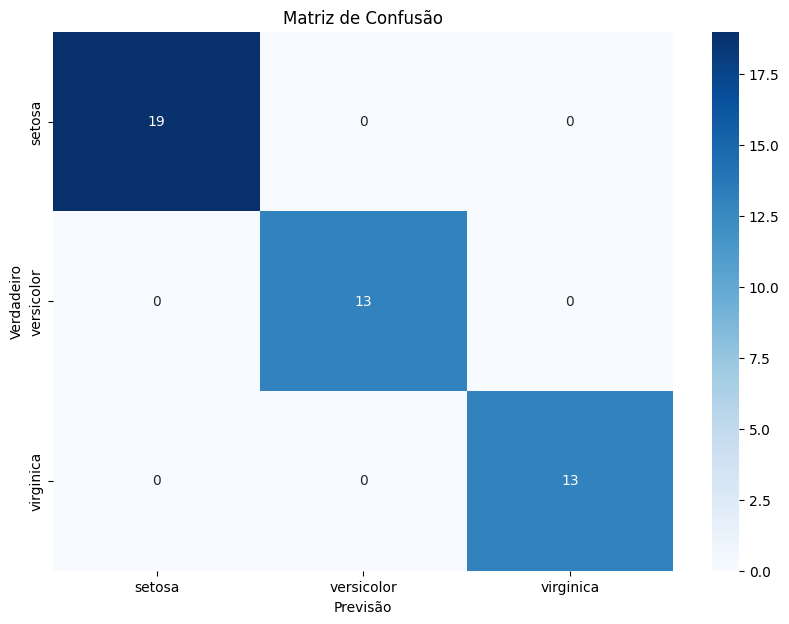

In [40]:
df_cm = pd.DataFrame(matrix_confusao, index=label_encode.classes_, columns=label_encode.classes_)

# Plot da matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()